# Análise de Dados de Poluição e Sintomas em Osasco

Este notebook integra dados de poluição atmosférica e sintomas reportados na cidade de Osasco, com o objetivo de investigar possíveis correlações entre eles. Serão utilizados gráficos, matrizes de correlação e outras visualizações para facilitar a análise.

In [5]:
#!pip install import-ipynb

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import import_ipynb
from carregar import df_poluicao_osasco, df_sintomas_osasco, df_empresas

In [7]:
print(df_poluicao_osasco.columns)
print(df_sintomas_osasco.columns)

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')
Index(['DT_NOTIFIC', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP',
       'SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT',
       'PERD_PALA', 'OUTRO_SIN'],
      dtype='object')


In [8]:
# Converte a coluna 'date' do DataFrame de poluição para o formato de data, considerando o formato dia/mês/ano.
df_poluicao_osasco['date'] = pd.to_datetime(df_poluicao_osasco['date'], dayfirst=True) 
# Converte a coluna 'DT_NOTIFIC' do DataFrame de sintomas também para o formato de data, considerando o formato dia/mês/ano.
df_sintomas_osasco['DT_NOTIFIC'] = pd.to_datetime(df_sintomas_osasco['DT_NOTIFIC'], dayfirst=True)

# Renomeia a coluna 'date' para 'data' no DataFrame de poluição, padronizando o nome da coluna de data.
df_poluicao_osasco = df_poluicao_osasco.rename(columns={'date': 'data'})
# Renomeia a coluna 'DT_NOTIFIC' para 'data' no DataFrame de sintomas, para permitir o merge com base em uma coluna comum.
df_sintomas_osasco = df_sintomas_osasco.rename(columns={'DT_NOTIFIC': 'data'})



C:\Users\welli\AppData\Local\Temp\ipykernel_13612\2347303578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sintomas_osasco['DT_NOTIFIC'] = pd.to_datetime(df_sintomas_osasco['DT_NOTIFIC'], dayfirst=True)


In [9]:
# Realiza a junção (merge) dos dois DataFrames com base na coluna 'data',
# unindo as informações de poluição e sintomas registradas na mesma data.
df_completo = pd.merge(df_poluicao_osasco, df_sintomas_osasco, on='data')
print(df_poluicao_osasco.columns)
print(df_sintomas_osasco.columns)

Index(['data', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')
Index(['data', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP',
       'SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT',
       'PERD_PALA', 'OUTRO_SIN'],
      dtype='object')


In [10]:
# Calcula a matriz de correlação entre todas as colunas numéricas do DataFrame completo.
# Isso mostra a força e direção da relação linear entre as variáveis (ex: entre PM2.5 e casos de febre).
correlacoes = df_completo.corr(numeric_only=True)
print("Matriz de Correlação:\n", correlacoes)

Matriz de Correlação:
               FEBRE     TOSSE  GARGANTA  DISPNEIA  DESC_RESP  SATURACAO  \
FEBRE      1.000000  0.465826  0.581842  0.589990   0.609323   0.543776   
TOSSE      0.465826  1.000000  0.716160  0.416082   0.481396   0.512265   
GARGANTA   0.581842  0.716160  1.000000  0.687676   0.705104   0.768689   
DISPNEIA   0.589990  0.416082  0.687676  1.000000   0.821996   0.739044   
DESC_RESP  0.609323  0.481396  0.705104  0.821996   1.000000   0.773689   
SATURACAO  0.543776  0.512265  0.768689  0.739044   0.773689   1.000000   
DIARREIA   0.677529  0.652873  0.816721  0.621507   0.641072   0.688454   
VOMITO     0.672951  0.620196  0.752822  0.536992   0.561896   0.632638   
DOR_ABD    0.687999  0.632407  0.826512  0.627406   0.647430   0.705304   
FADIGA     0.512560  0.631412  0.797981  0.594999   0.609476   0.678215   
PERD_OLFT  0.656303  0.594435  0.786092  0.599224   0.622132   0.682708   
PERD_PALA  0.661672  0.604762  0.815159  0.588382   0.613710   0.700079   
OU

# Gráficos

## Análise Gráfica dos Dados
### 1. Mapa de Calor - Correlação entre Sintomas

Este gráfico mostra a força e direção das correlações entre os diferentes sintomas registrados.

Cores mais quentes (vermelho) indicam correlações positivas mais fortes, enquanto cores mais frias (azul) indicam correlações negativas.

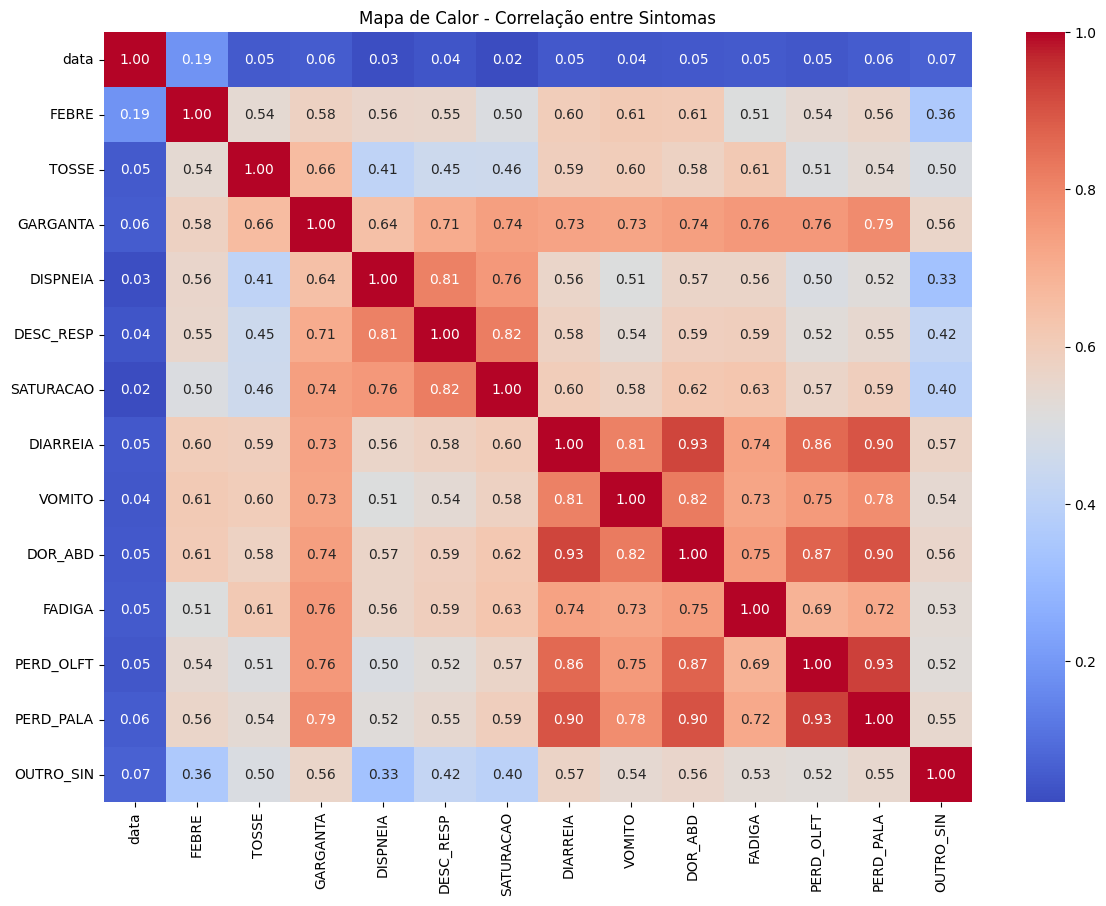

In [11]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_sintomas_osasco.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor - Correlação entre Sintomas")
plt.show()

## 2. Evolução dos Sintomas ao Longo do Tempo (Semanal)

Este gráfico mostra como os casos de sintomas evoluíram ao longo do tempo, com uma agregação semanal.

Ajuda a identificar tendências, surtos ou períodos de alta notificação de sintomas.

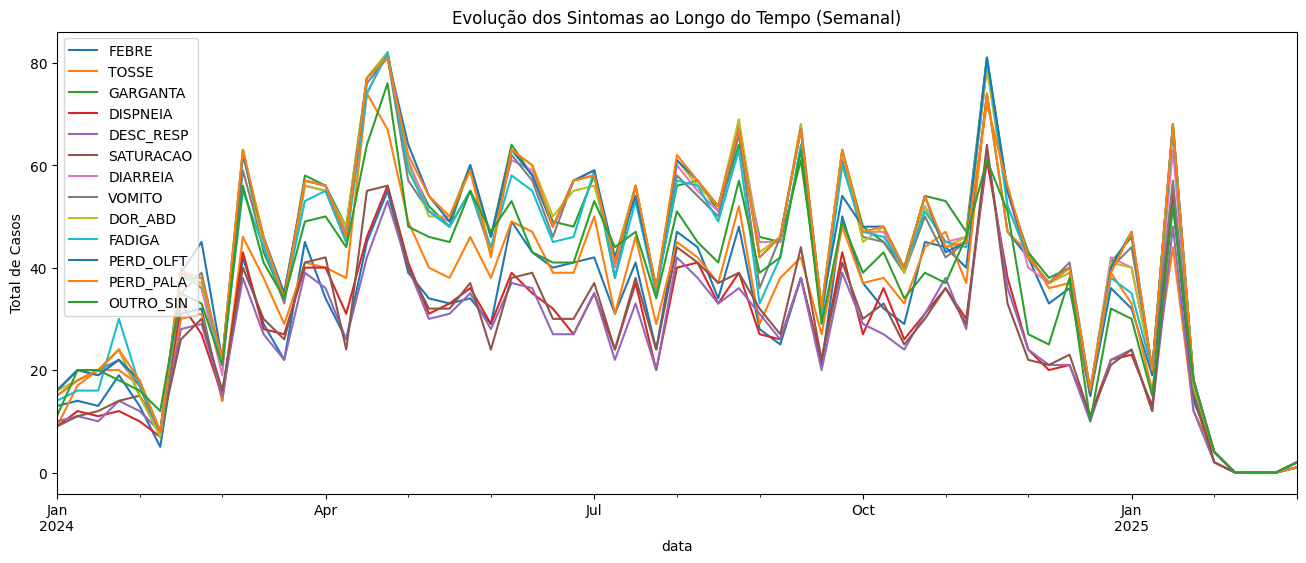

In [12]:
# sintomas ao longo do tempo
df_sintomas_osasco.set_index('data').resample('W').sum().plot(figsize=(16, 6))
plt.title("Evolução dos Sintomas ao Longo do Tempo (Semanal)")
plt.ylabel("Total de Casos")
plt.show()

## 3. Correlação entre PM2.5 e Febre

#### Gráfico de Regressão: PM2.5 x Febre

Este gráfico analisa a relação entre os níveis de partículas finas no ar (PM2.5) e a ocorrência de febre. 
Foi utilizada uma regressão linear para verificar a tendência dos dados. 
A linha traçada ajuda a visualizar se há uma correlação positiva ou negativa — neste caso, 
indica que a febre pode aumentar com a elevação dos níveis de PM2.5, sugerindo um possível impacto da poluição na saúde da população.

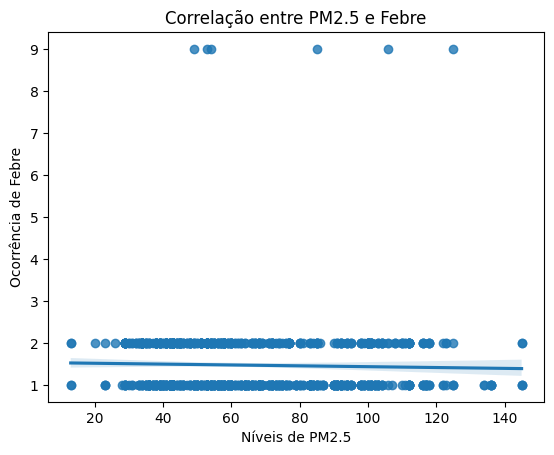

In [13]:
df_completo.columns = df_completo.columns.str.strip()
df_completo['pm25'] = pd.to_numeric(df_completo['pm25'], errors='coerce')

# relação entre PM2.5 e febre
sns.regplot(x='pm25', y='FEBRE', data=df_completo)
plt.xlabel("Níveis de PM2.5")
plt.ylabel("Ocorrência de Febre")
plt.title("Correlação entre PM2.5 e Febre")
plt.show()


## 4. Média de Casos por Sintoma

Mostra a média de ocorrência de cada sintoma ao longo do tempo.

Ajuda a entender quais sintomas são mais comuns na população analisada.

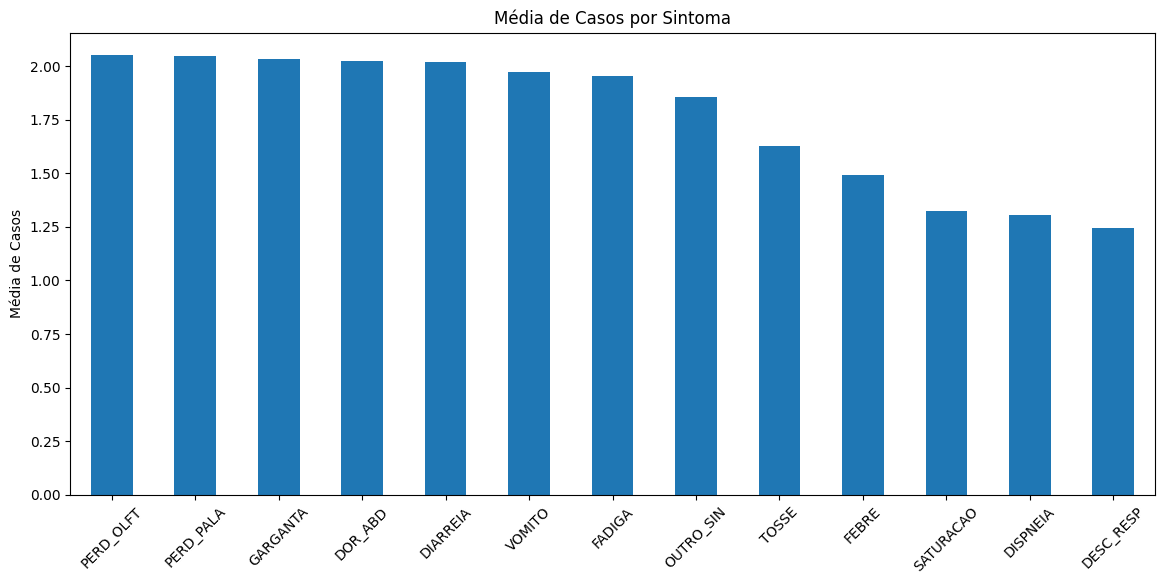

In [14]:
# Médias dos sintomas
df_sintomas_osasco.drop(columns='data').mean().sort_values(ascending=False).plot(kind='bar', figsize=(14, 6))
plt.title("Média de Casos por Sintoma")
plt.ylabel("Média de Casos")
plt.xticks(rotation=45)
plt.show()


## 5. Concentração Média dos Poluentes em Osasco

Este gráfico mostra a concentração média dos principais poluentes atmosféricos registrados em Osasco.
 
Cada barra representa a média de um tipo de poluente ao longo do período analisado. 

Esse tipo de visualização é essencial para identificar quais poluentes estão mais presentes 
na atmosfera local e quais podem ter maior impacto sobre a saúde pública.


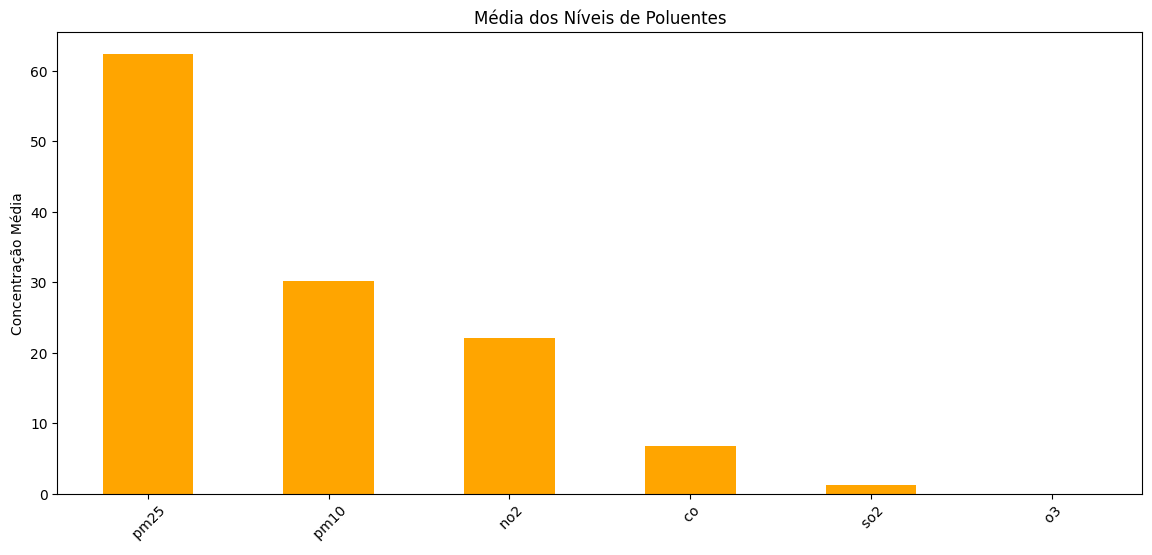

In [15]:
# Convertendo colunas para numéricas (forçando erros para NaN onde não for possível)
df_numeric = df_poluicao_osasco.drop(columns='data', errors='ignore').apply(pd.to_numeric, errors='coerce')

# Agora podemos calcular as médias corretamente
df_numeric.mean().sort_values(ascending=False).plot(kind='bar', color='orange', figsize=(14, 6))
plt.title("Média dos Níveis de Poluentes")
plt.ylabel("Concentração Média")
plt.xticks(rotation=45)
plt.show()



## 6. Dispersão Temporal entre PM2.5 e Febre

Gráfico de dispersão com coloração variando ao longo do tempo.

Permite visualizar se a relação entre PM2.5 e febre muda com o passar dos dias.

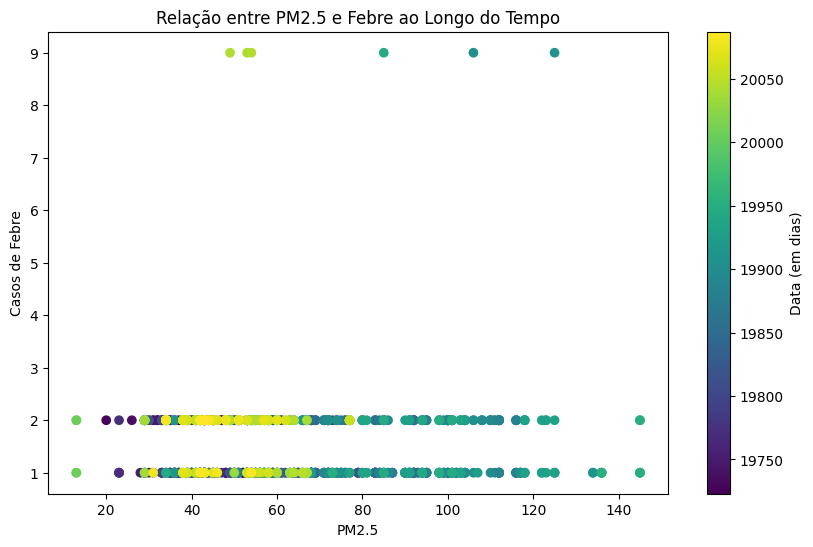

In [16]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt  # <-- reimporta após mdates

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_completo['pm25'], df_completo['FEBRE'], 
                      c=df_completo['data'].map(mdates.date2num), cmap='viridis')
plt.colorbar(scatter, label='Data (em dias)')
plt.xlabel('PM2.5')
plt.ylabel('Casos de Febre')
plt.title('Relação entre PM2.5 e Febre ao Longo do Tempo')
plt.show()

## 7. Pairplot - Relação entre Sintomas

Um gráfico de dispersão para todas as combinações de sintomas, incluindo histogramas das distribuições.

Facilita a identificação de padrões e agrupamentos entre diferentes sintomas.

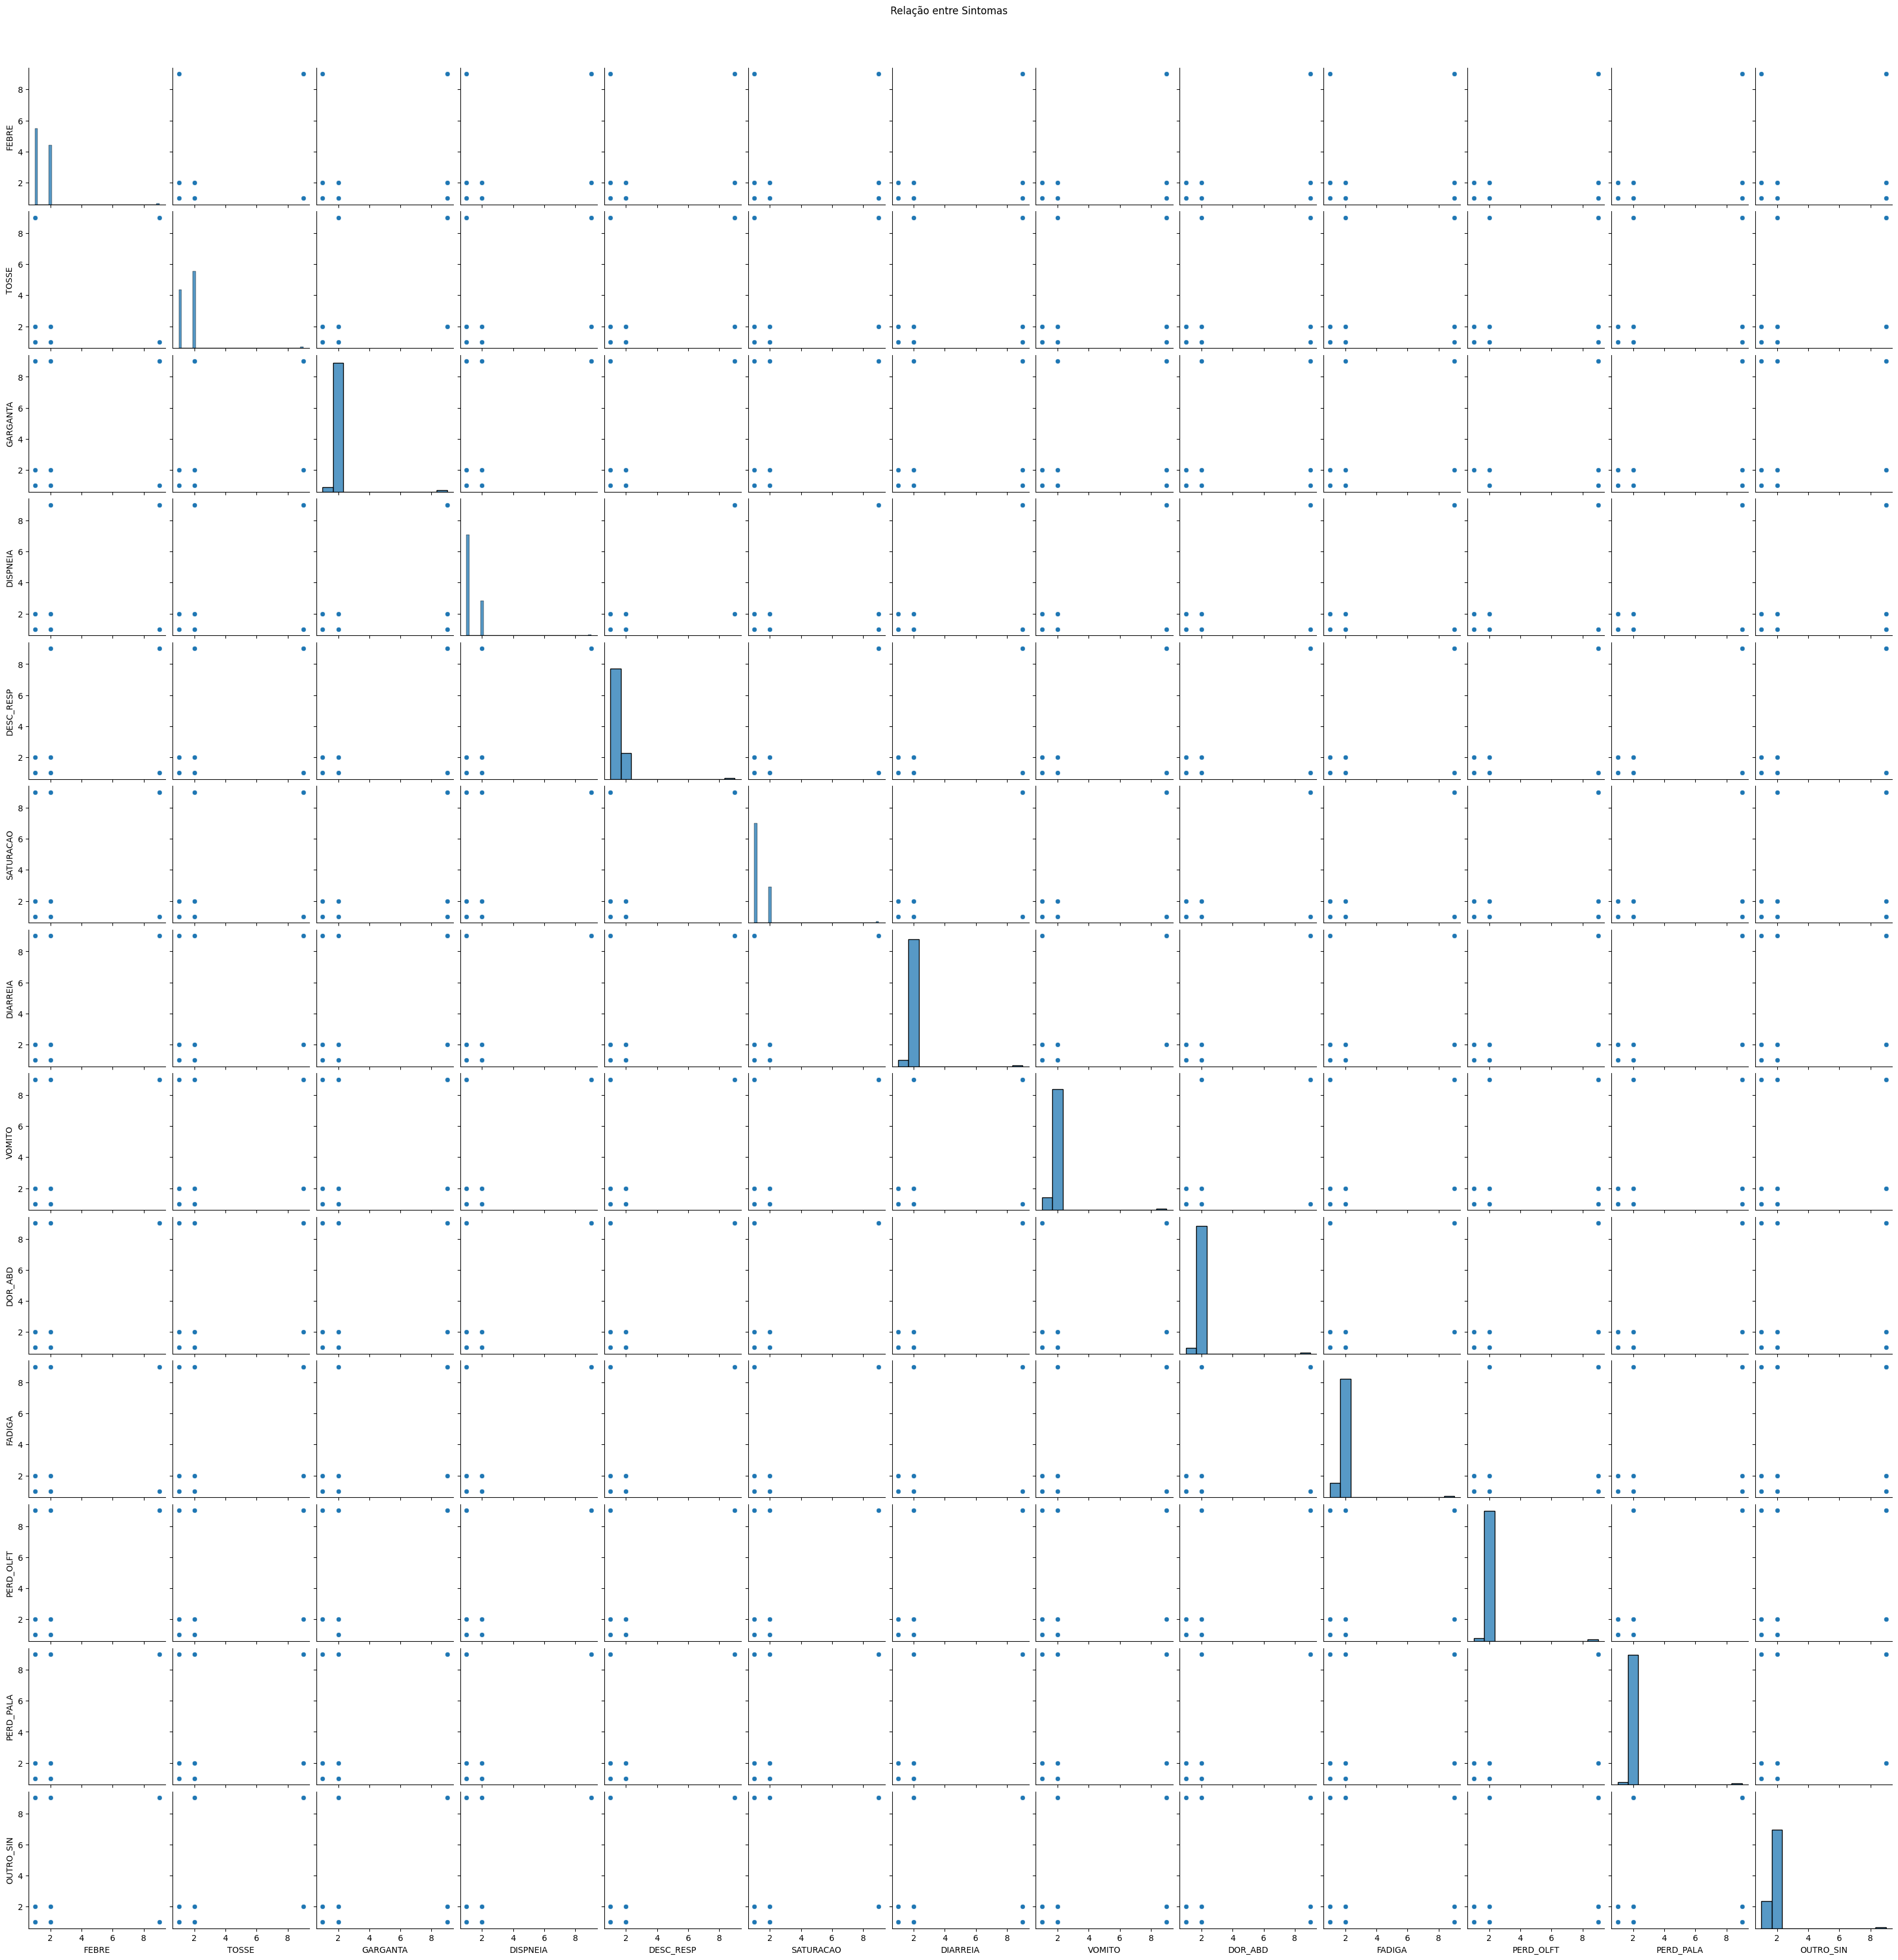

In [17]:
sns.pairplot(df_sintomas_osasco.drop(columns='data'))
plt.suptitle("Relação entre Sintomas", y=1.02)
plt.show()
